In [9]:
### Importação dos módulos necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Baixar dataset

In [39]:
arquivo_csv = 'data.csv'


df = pd.read_csv(arquivo_csv, sep=';', skiprows=1, names=['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target'])

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Visualizar dados graficamente

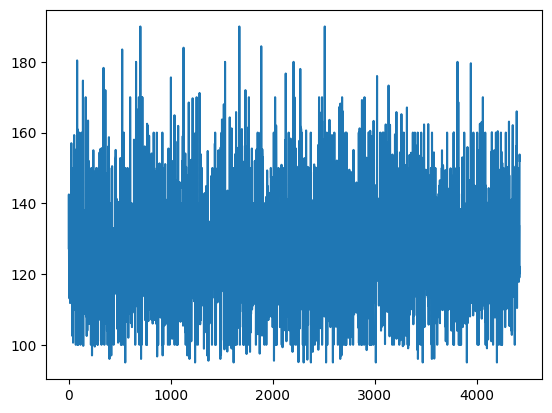

In [62]:
plt.plot(df['Admission grade'].values)
plt.show()


Preprocessar os dados:

In [42]:
 # remoção de uma coluna que estava em string
if 'Target' in df:
    df = df[df['Target'] != 'Dropout']

# convertendo o dataframe para float
df = df.astype({'Admission grade': 'float32'})

normalizador = MinMaxScaler()
df_normalizado = normalizador.fit_transform(df)

print(df_normalizado)


[[0.         0.28571429 0.55555556 ... 0.37209302 0.48888889 0.7661823 ]
 [0.         0.25       0.11111111 ... 0.73255814 0.11111111 0.64068692]
 [0.         0.         0.55555556 ... 0.37209302 0.48888889 0.7661823 ]
 ...
 [0.         0.         0.11111111 ... 0.73255814 0.11111111 0.64068692]
 [0.         0.         0.11111111 ... 0.20930233 0.         0.12417437]
 [0.         0.16071429 0.11111111 ... 0.59302326 1.         0.31175694]]


In [44]:
train_dataset_size = int(len(df) * 0.67)
test_dataset_size = len(df) - train_dataset_size
train_dataset = df_normalizado[:train_dataset_size, :]
test_dataset = df_normalizado[train_dataset_size:, :]
print("Tamanho do conjunto de treino: ", len(train_dataset))
print("Tamanho do conjunto de teste: ", len(test_dataset))

Tamanho do conjunto de treino:  2964
Tamanho do conjunto de teste:  1460


In [45]:
### Estruturação dos dados de treino e teste
def structure_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

lb = 1
trainX, trainY = structure_dataset(train_dataset, lb)
testX, testY = structure_dataset(test_dataset, lb)

In [46]:
### Configuração e treinamento do modelo
model = Sequential()
model.add(LSTM(4, input_shape=(1, lb)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2962/2962 - 8s - loss: 0.0134 - 8s/epoch - 3ms/step
Epoch 2/100
2962/2962 - 6s - loss: 0.0133 - 6s/epoch - 2ms/step
Epoch 3/100
2962/2962 - 7s - loss: 0.0133 - 7s/epoch - 2ms/step
Epoch 4/100
2962/2962 - 7s - loss: 0.0133 - 7s/epoch - 2ms/step
Epoch 5/100
2962/2962 - 6s - loss: 0.0133 - 6s/epoch - 2ms/step
Epoch 6/100
2962/2962 - 6s - loss: 0.0133 - 6s/epoch - 2ms/step
Epoch 7/100
2962/2962 - 6s - loss: 0.0133 - 6s/epoch - 2ms/step
Epoch 8/100
2962/2962 - 6s - loss: 0.0133 - 6s/epoch - 2ms/step
Epoch 9/100
2962/2962 - 8s - loss: 0.0133 - 8s/epoch - 3ms/step
Epoch 10/100
2962/2962 - 8s - loss: 0.0133 - 8s/epoch - 3ms/step
Epoch 11/100
2962/2962 - 7s - loss: 0.0133 - 7s/epoch - 2ms/step
Epoch 12/100
2962/2962 - 7s - loss: 0.0133 - 7s/epoch - 2ms/step
Epoch 13/100
2962/2962 - 7s - loss: 0.0133 - 7s/epoch - 2ms/step
Epoch 14/100
2962/2962 - 6s - loss: 0.0133 - 6s/epoch - 2ms/step
Epoch 15/100
2962/2962 - 6s - loss: 0.0133 - 6s/epoch - 2ms/step
Epoch 16/100
2962/2962 - 6s - loss

In [60]:
trainPredict = model.predict(trainX)

# normalizando novamente a coluna de Admission grade
normalizador = MinMaxScaler()
trainY = trainY.reshape(-1, 1)
trainPredict = trainPredict.reshape(-1, 1)
normalizador.fit(trainY)  # voltando a ajustar o normalizador com a coluna 'Admission grade' do conjunto de treino

# aplicando normalizador ao trainY inverso
trainY_original = normalizador.inverse_transform(trainY)
trainPredict_original = normalizador.inverse_transform(trainPredict)

# calculo dos valores previstos de teste
testPredict = model.predict(testX)

# normaliza a coluna de Admission grade separado do conjunto de teste
testY = testY.reshape(-1, 1)
testPredict = testPredict.reshape(-1, 1)
normalizador.fit(testY)  # Ajuste o normalizador com a coluna 'Admission grade' do conjunto de teste

# aplicando normalizador ao testY inverso
testY_original = normalizador.inverse_transform(testY)
testPredict_original = normalizador.inverse_transform(testPredict)

# Calcule os erros RMSE
trainScore = np.sqrt(mean_squared_error(trainY_original, trainPredict_original))
print('Train Score: %.2f RMSE' % trainScore)
testScore = np.sqrt(mean_squared_error(testY_original, testPredict_original))
print('Test Score: %.2f RMSE' % testScore)

46/46 [==============================] - 0s 3ms/step
Train Score: 0.11 RMSE
Test Score: 0.10 RMSE


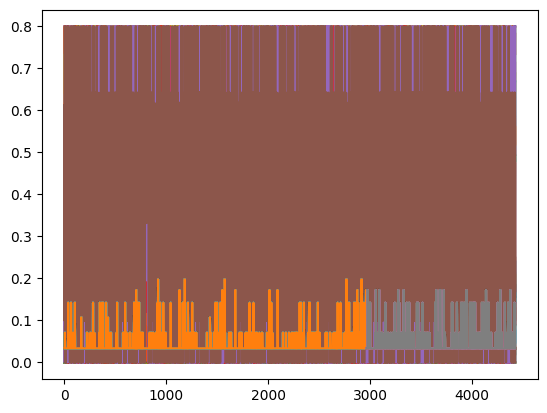

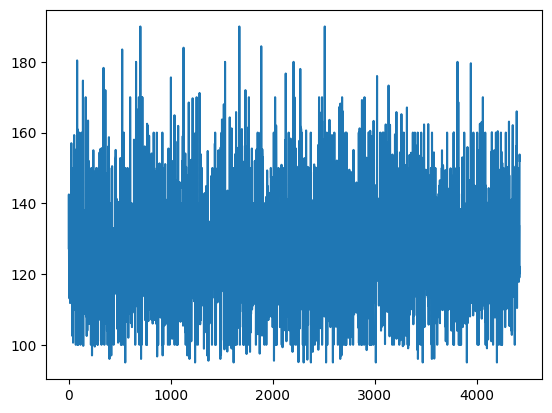

In [63]:
### Resultados
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lb:len(trainPredict)+lb, :] = trainPredict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lb*2)+1:len(df)-1, :] = testPredict

plt.plot(normalizador.inverse_transform(df_normalizado))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


plt.plot(df['Admission grade'].values)
plt.show()